# Regressão Linear Simples

### Definindo o Problema de Negócio

Nosso objetivo é construir um modelo de Machine Learning que seja capaz de fazer previsões sobre a taxa média de ocupação de casas na região de Boston, EUA, por proprietários. A variável a ser prevista é um valor numérico que representa a mediana da taxa de ocupação das casas em Boston. Para cada casa temos diversas variáveis explanatórias. Sendo assim, podemos resolver este problema empregando Regressão Linear Simples ou Múltipla.

### Definindo o Dataset

Usaremos o Boston Housing Dataset, que é um conjunto de dados que tem a taxa média de ocupação das casas, juntamente com outras 13 variáveis que podem estar relacionadas aos preços das casas. Esses são os fatores como condições socioeconômicas, condições ambientais, instalações educacionais e alguns outros fatores semelhantes. Existem 506 observações nos dados para 14 variáveis. Existem 12 variáveis numéricas em nosso conjunto de dados e 1 variável categórica. O objetivo deste projeto é construir um modelo de regressão linear para estimar a taxa média de ocupação das casas pelos proprietários em Boston.

#### Estudo realizado durante o capítulo 5 do curso de Machine Learning da Formação Cientista de Dados da Data Science Academy - https://www.datascienceacademy.com.br/

# Carregando dados e bibliotecas

In [1]:
#Carregando dataset
from sklearn.datasets import load_boston
boston = load_boston()

Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. TARGET: Median value of owner-occupied homes in $1000's

In [2]:
#Importa bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Análise Exploratória

In [3]:
#Carregando dados para DF
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset['target'] = boston.target

Verificando primeiros dados

In [4]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Verificando comportamento das categorias

In [5]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Plotando os dados

In [6]:
# Definindo o range dos valores de x e y
xRange = [dataset['RM'].min(),dataset['RM'].max()]
yRange = [dataset['target'].min(),dataset['target'].max()]

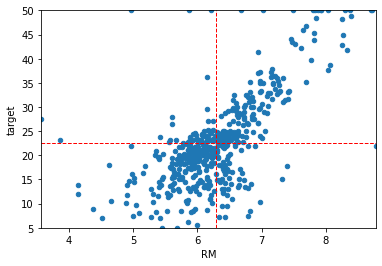

In [7]:
# Plot dos valores de x e y com a média
scatter_plot = dataset.plot(kind = 'scatter', x = 'RM', y = 'target', xlim = xRange, ylim = yRange)

# Cálculo da média
meanY = scatter_plot.plot(xRange, [dataset['target'].mean(),dataset['target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([dataset['RM'].mean(), dataset['RM'].mean()], yRange, '--', color = 'red', linewidth = 1)

# Regressão Linear com StatsModels

In [8]:
#Importando funções
import statsmodels.api as sm

In [9]:
#Definindo as variáveis que serão utilizados
y = dataset['target']
x = dataset['RM']

In [10]:
#Adicionando constante para criação do modelo (apenas aceita matriz)
x = sm.add_constant(x)

In [11]:
#Cria modelo
modelo = sm.OLS(y,x)

#Treina modelo
modelov1 = modelo.fit()

In [12]:
print(modelov1.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           2.49e-74
Time:                        11:24:38   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

In [13]:
#Verificando parâmetros criados com o modelo
print(modelov1.params)

const   -34.670621
RM        9.102109
dtype: float64


In [14]:
#Gerando valores previstos
valPrevistos = modelov1.predict(x)
valPrevistos

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

#### Gerando gráfico para ilustar a Regressão Linear

In [15]:
# Range de valores para x e y
xRange = [dataset['RM'].min(), dataset['RM'].max()]
yRange = [dataset['target'].min(), dataset['target'].max()]

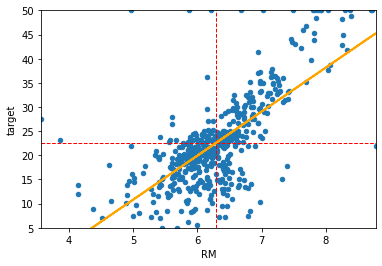

In [16]:
# Primeira camada do Scatter Plot
scatter_plot = dataset.plot(kind = 'scatter', x = 'RM', y = 'target', xlim = xRange, ylim = yRange)

# Segunda camada do Scatter Plot (médias)
meanY = scatter_plot.plot(xRange, [dataset['target'].mean(),dataset['target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([dataset['RM'].mean(),dataset['RM'].mean()], yRange, '--', color = 'red', linewidth = 1)

# Terceira camada do Scatter Plot (linha de regressão)
regression_line = scatter_plot.plot(dataset['RM'], valPrevistos, '-', color = 'orange', linewidth = 2)

# Regressão Linear com Scikit-Learn

In [17]:
#Importa biblioteca
from sklearn import linear_model

In [18]:
#Cria modelo
modelov2 = linear_model.LinearRegression(normalize = False, fit_intercept = True)

In [19]:
#Define X e Y
num_observ = len(dataset)
x = dataset['RM'].values.reshape((num_observ, 1))
y = dataset['target'].values

In [20]:
#Treina modelo
modelov2.fit(x,y)

LinearRegression()

In [21]:
#Verificando parâmetros criados com o modelo
print (modelov2.coef_)
print (modelov2.intercept_)

[9.10210898]
-34.670620776438554


In [22]:
#Gerando valores previstos
print (modelov2.predict(x))

[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155 23.3735282  20.02395209
 18.93169901 19.47782555 20.81583557 18.43108302 19.35039603 19.85101202
 14.99048582 17.45715736 16.02812625 19.6234593  21.23453259 18.23993873
 19.25027283 16.29208741 18.23993873 20.36983223 24.44757706 26.07685456
 17.32972783 20.59738496 19.48692766 17.22050253 20.81583557 19.33219181
 18.49479778 18.57671676 19.63256141 25.35778795 29.26259271 26.95065703
 21.48028953 21.86257811 20.57007863 17.04756245 17.99418179 20.21509638
 14.47166561 16.31939374 19.60525508 20.98877564 24.5932108  19.92382889
 18.9225969  31.31056723 23.42814085 27.36935404 21.26183891 19.27757916
 17.58458688 19.63256141 24.09259481 26.87784015 29.99076143 22.58164472
 18.0032839  18.83157581 16.24657686 18.89529058 23.73761256 19.58705086
 20.53367019 22.17204981 22.42690886 22.54523628 22.48152152 21.21632837
 22.05372239 18.79516738 26.55926634 25.57623857 22

# Regressão Linear Múltipla

In [23]:
#Importa bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

In [24]:
#Carregando dados para DF
dataset2 = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset2['target'] = boston.target

## Criando modelo com todas variáveis

In [25]:
#Definindo as variáveis que serão utilizados
y = dataset2['target']
x = dataset2.iloc[:,:-1]

In [26]:
#Adiciona constante
xc = sm.add_constant(x)

In [27]:
#Cria modelo
modelo2 = sm.OLS(y, xc)

In [28]:
#Treina modelo
modelov3 = modelo2.fit()

In [29]:
#Verifica parâmetros do modelo
modelov3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 27 Apr 2022   Prob (F-statistic):          6.72e-135
Time:                        11:34:21   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

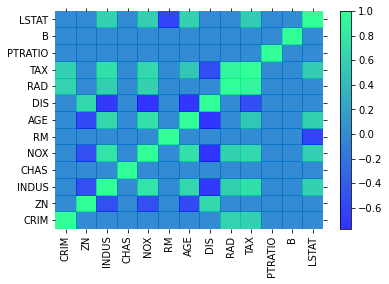

In [42]:
#Criando um Correlation Plot
R = np.corrcoef(x, rowvar = 0)
R[np.where(np.abs(R) < 0.5)] = 0.0
heatmap = plt.pcolor(R, cmap = mpl.cm.winter, alpha = 0.8)
heatmap.axes.set_frame_on(False)
heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
heatmap.axes.set_xticklabels(x, minor = False)
plt.xticks(rotation=90)
heatmap.axes.set_yticklabels(x, minor = False)
plt.tick_params(axis = 'both', which = 'both', bottom = 'off', top = 'off', left = 'off', right = 'off') 
plt.colorbar()
plt.show()

As variáveis TAX e RAD apresentam um alto valor de corelação entre elas, podendo gerar uma interferência no modelo.
Para evitar utilizar variáveis tendenciosas, será aplicado Feature Scaling e depois verificado a importância de cada variável no resultado do target para criar um modelo mais genérico.

## Importância das variáveis

In [43]:
#Criando um modelo com todas as variáveis
modelo3 = linear_model.LinearRegression(normalize = False, fit_intercept = True)

In [44]:
#Padronização dos dados
standardization = StandardScaler()
Stand_coef_linear_reg = make_pipeline(standardization, modelo3)

In [45]:
#Treinando modelo
Stand_coef_linear_reg.fit(x,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [46]:
#Verificando os valores de importância das variáveis
for coef, var in sorted(zip(map(abs, Stand_coef_linear_reg.steps[1][1].coef_), dataset.columns[:-1]), reverse = True):
    print ("%6.3f %s" % (coef,var))

 3.744 LSTAT
 3.104 DIS
 2.674 RM
 2.662 RAD
 2.077 TAX
 2.061 PTRATIO
 2.057 NOX
 1.082 ZN
 0.928 CRIM
 0.849 B
 0.682 CHAS
 0.141 INDUS
 0.019 AGE


### Utilizando o R² para verificar a importância

In [52]:
modelo4 = linear_model.LinearRegression(normalize = False, fit_intercept = True)

In [55]:
#Verifica o impacto no R² de cada variável
def r2_est(x,y):
    return r2_score(y, modelo4.fit(x,y).predict(x))

In [56]:
#Imprime os impactos
r2_impact = list()
for j in range(x.shape[1]):
    selection = [i for i in range(x.shape[1]) if i!=j]
    r2_impact.append(((r2_est(x,y) - r2_est(x.values[:,selection],y)), dataset.columns[j]))
    
for imp, varname in sorted(r2_impact, reverse = True):
    print ('%6.3f %s' %  (imp, varname))

 0.056 LSTAT
 0.044 RM
 0.029 DIS
 0.028 PTRATIO
 0.011 NOX
 0.011 RAD
 0.006 B
 0.006 ZN
 0.006 CRIM
 0.006 TAX
 0.005 CHAS
 0.000 INDUS
 0.000 AGE


Dessa forma, pode ser criado um modelo utilizando apenas as variáveis LSTAT, RM, DIS e PTRATIO para um novo modelo de regressão, sendo que são as variáveis que mais impactam no R²

### Criando modelo Regressão Múltipla com as Variáveis Selecionadas

In [57]:
#Importando bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [58]:
#Definindo x e y
x = dataset[['LSTAT', 'RM', 'DIS', 'PTRATIO']]
y = dataset['target'].values

In [59]:
#Divisão dos dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

In [60]:
#Criando modelo
modelo5 = LinearRegression(normalize = False, fit_intercept = True)

In [61]:
#Treinando modelo
modelov5 = modelo5.fit(x_train, y_train)

In [63]:
#Calcula o r²
r2_score(y_test, modelov5.fit(x_train, y_train).predict(x_test))

0.661383670138217

Para fazer novas previsões, basta alterar os valores das 4 variáveis utilizadas:

In [67]:
#Novos dados - Alterar para novas previsões
LSTAT = 3
RM = 6
DIS = 4
PTRATIO = 10

#Lista com os valores das variáveis
novosDados = [LSTAT, RM, DIS, PTRATIO]

# Reshape
Xp = np.array(novosDados).reshape(1, -1)

# Previsão
print("Taxa Média de Ocupação:", modelov5.predict(Xp))

Taxa Média de Ocupação: [35.54034071]


#### Todo código foi construído no curso de Machine Learning da Formação Cientista de Dados da Data Science Academy, durante o capítulo 5 - Regressão Linear.